In [35]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [57]:
pip install rake-nltk


In [67]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [74]:
import pandas as pd
import spacy
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from rake_nltk import Rake
import nltk
from collections import Counter
import re



In [3]:
df = pd.read_csv(r'BA_Reviews.csv')

In [4]:
df.shape

(1000, 3)

In [7]:
df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [11]:
df.isnull().sum()


Unnamed: 0       0
Verified_tags    0
reviews          0
dtype: int64

In [12]:
df['reviews'].iloc[100]

' This review is for LHR-SYD-LHR. BA015 and BA016. Business class had a 1-2-1 configuration on 777 giving space, privacy and easy aisle access. Seat reclines into comfortable flat bed. Good quality pillow and duvet. Privacy with sliding door. Good storage space around the seat and charging point. Flights on time - no delays. Gluten free meals were very poor in quality and presentation. Warm processed meat between two bland slices of GF bread apparently is a business class breakfast. On two sectors the main course (no choice offered) was bland fish which was served in a single small tray covered with foil - in business class? Condensation had formed as the dish was reheated (probably from chilled) so the offering was sitting in a weak watery liquid. One crew member appeared genuinely apologetic as they meekly served one meal. Do BA also serve the same GF offering in economy, economy plus and first on a long haul flight? My advice if GF - take your own food or dine in the lounge if you a

In [13]:
# Deleting unwanted symbols and numeric data

df['processed_reviews']=df['reviews'].str.replace(r'[^a-zA-Z]',' ', regex=True)

In [14]:
df.head()

,Unnamed: 0,Verified_tags,reviews,processed_reviews
0,0,Not Verified,Singapore to Heathrow. Business class on an...,Singapore to Heathrow Business class on an...
1,1,Not Verified,I reported my damaged/ruined suitcase 5 wee...,I reported my damaged ruined suitcase wee...
2,2,Not Verified,"On March 1st, I flew from Berlin to São Pau...",On March st I flew from Berlin to S o Pau...
3,3,Not Verified,The WORST customer experience! British Airway...,The WORST customer experience British Airway...
4,4,Not Verified,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance d...


In [15]:
df['processed_reviews'].iloc[100]

' This review is for LHR SYD LHR  BA    and BA     Business class had a       configuration on     giving space  privacy and easy aisle access  Seat reclines into comfortable flat bed  Good quality pillow and duvet  Privacy with sliding door  Good storage space around the seat and charging point  Flights on time   no delays  Gluten free meals were very poor in quality and presentation  Warm processed meat between two bland slices of GF bread apparently is a business class breakfast  On two sectors the main course  no choice offered  was bland fish which was served in a single small tray covered with foil   in business class  Condensation had formed as the dish was reheated  probably from chilled  so the offering was sitting in a weak watery liquid  One crew member appeared genuinely apologetic as they meekly served one meal  Do BA also serve the same GF offering in economy  economy plus and first on a long haul flight  My advice if GF   take your own food or dine in the lounge if you a

In [16]:
# Handling unwanted spaces

df['processed_reviews_2']=df['processed_reviews'].str.replace(r'[\s]+',' ',regex = True)

In [19]:
df.head()

,Unnamed: 0,Verified_tags,reviews,processed_reviews,processed_reviews_2
0,0,Not Verified,Singapore to Heathrow. Business class on an...,Singapore to Heathrow Business class on an...,Singapore to Heathrow Business class on an A ...
1,1,Not Verified,I reported my damaged/ruined suitcase 5 wee...,I reported my damaged ruined suitcase wee...,I reported my damaged ruined suitcase weeks a...
2,2,Not Verified,"On March 1st, I flew from Berlin to São Pau...",On March st I flew from Berlin to S o Pau...,On March st I flew from Berlin to S o Paulo w...
3,3,Not Verified,The WORST customer experience! British Airway...,The WORST customer experience British Airway...,The WORST customer experience British Airways...
4,4,Not Verified,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance d...,Had to cancel my flight months in advance due...


In [20]:
df['reviews'].iloc[100]

' This review is for LHR-SYD-LHR. BA015 and BA016. Business class had a 1-2-1 configuration on 777 giving space, privacy and easy aisle access. Seat reclines into comfortable flat bed. Good quality pillow and duvet. Privacy with sliding door. Good storage space around the seat and charging point. Flights on time - no delays. Gluten free meals were very poor in quality and presentation. Warm processed meat between two bland slices of GF bread apparently is a business class breakfast. On two sectors the main course (no choice offered) was bland fish which was served in a single small tray covered with foil - in business class? Condensation had formed as the dish was reheated (probably from chilled) so the offering was sitting in a weak watery liquid. One crew member appeared genuinely apologetic as they meekly served one meal. Do BA also serve the same GF offering in economy, economy plus and first on a long haul flight? My advice if GF - take your own food or dine in the lounge if you a

In [21]:
df.drop(columns = ['Unnamed: 0', 'Verified_tags','reviews','processed_reviews'], inplace = True)


In [22]:
df.head()

,processed_reviews_2
0,Singapore to Heathrow Business class on an A ...
1,I reported my damaged ruined suitcase weeks a...
2,On March st I flew from Berlin to S o Paulo w...
3,The WORST customer experience British Airways...
4,Had to cancel my flight months in advance due...


In [23]:
# NLP
nlp = spacy.load('en_core_web_sm')

In [24]:
# lemmatization
def lemmatization(text):
  doc = nlp(text)
  lemmalist = [word.lemma_ for word in doc]
  return ' '.join(lemmalist)

In [25]:
df['lemma_reviews']=df['processed_reviews_2'].apply(lemmatization)


In [26]:
df.head()

,processed_reviews_2,lemma_reviews
0,Singapore to Heathrow Business class on an A ...,Singapore to Heathrow Business class on an a...
1,I reported my damaged ruined suitcase weeks a...,I report my damage ruin suitcase week ago an...
2,On March st I flew from Berlin to S o Paulo w...,on March st I fly from Berlin to S o Paulo w...
3,The WORST customer experience British Airways...,the bad customer experience British Airways ...
4,Had to cancel my flight months in advance due...,have to cancel my flight month in advance du...


In [27]:
# Removing the stopwords
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [28]:
df['final_reviews']=df['lemma_reviews'].apply(remove_stopwords)


In [29]:
df.head()

,processed_reviews_2,lemma_reviews,final_reviews
0,Singapore to Heathrow Business class on an A ...,Singapore to Heathrow Business class on an a...,Singapore Heathrow Business class Premium E...
1,I reported my damaged ruined suitcase weeks a...,I report my damage ruin suitcase week ago an...,report damage ruin suitcase week ago m awai...
2,On March st I flew from Berlin to S o Paulo w...,on March st I fly from Berlin to S o Paulo w...,March st fly Berlin S o Paulo BA encounter ...
3,The WORST customer experience British Airways...,the bad customer experience British Airways ...,bad customer experience British Airways BA ...
4,Had to cancel my flight months in advance due...,have to cancel my flight month in advance du...,cancel flight month advance change schedule...


In [30]:
df['final_reviews'].iloc[100]

'   review LHR SYD LHR BA BA Business class configuration space privacy easy aisle access Seat recline comfortable flat bed good quality pillow duvet Privacy slide door good storage space seat charge point Flights time delay Gluten free meal poor quality presentation Warm process meat bland slice GF bread apparently business class breakfast sector main course choice offer bland fish serve single small tray cover foil business class Condensation form dish reheat probably chill offering sit weak watery liquid crew member appear genuinely apologetic meekly serve meal BA serve gf offer economy economy plus long haul flight advice GF food dine lounge care BA hour travel companion good regular meal tell choice main course flight Crew impression job cover basic welcome engage usual hospitality industry waffle service little substance deliver'

In [31]:
df.drop(columns = ['processed_reviews_2', 'lemma_reviews'], inplace = True)


In [32]:
df.head()

,final_reviews
0,Singapore Heathrow Business class Premium E...
1,report damage ruin suitcase week ago m awai...
2,March st fly Berlin S o Paulo BA encounter ...
3,bad customer experience British Airways BA ...
4,cancel flight month advance change schedule...


In [37]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [38]:
# Function to get sentiment using VADER
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [39]:
# Apply sentiment analysis
df['sentiment'] = df['final_reviews'].apply(get_vader_sentiment)


In [41]:
# Classify sentiments
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [43]:
# Calculate percentages
total_reviews = len(df)
positive_reviews = len(df[df['sentiment_class'] == 'positive'])
negative_reviews = len(df[df['sentiment_class'] == 'negative'])
neutral_reviews = len(df[df['sentiment_class'] == 'neutral'])

positive_percentage = (positive_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100

In [98]:
print(positive_reviews)
print(negative_reviews)
print(neutral_reviews)

560
430
10


In [44]:
print(f"Positive Reviews: {positive_percentage:.2f}%")
print(f"Negative Reviews: {negative_percentage:.2f}%")
print(f"Neutral Reviews: {neutral_percentage:.2f}%")

Positive Reviews: 56.00%
Negative Reviews: 43.00%
Neutral Reviews: 1.00%


In [46]:
# Create a DataFrame for the chart
sentiment_data = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Percentage': [positive_percentage, negative_percentage, neutral_percentage]
})

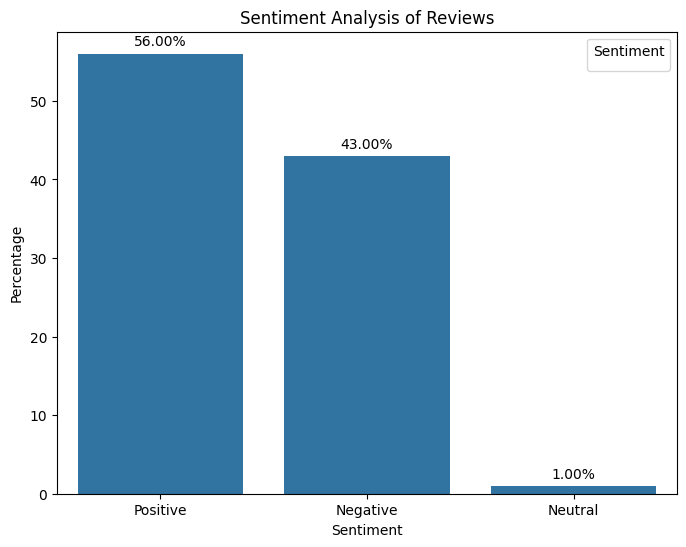

In [55]:
# Plot the chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Sentiment', y='Percentage', data=sentiment_data)
plt.title('Sentiment Analysis of Reviews')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')

# Add data labels
for index, row in sentiment_data.iterrows():
    barplot.text(row.name, row.Percentage + 1, f'{row.Percentage:.2f}%', color='black', ha="center")

# Add legend with colors
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title='Sentiment', loc='upper right')


plt.show()


In [75]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

In [76]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['final_reviews'].astype(str).apply(preprocess_text))


In [79]:
# Step 3: Count keywords
words = all_reviews.split()
keyword_counts = Counter(words)


In [92]:
# Step 4: Rank the keywords
ranked_keywords = keyword_counts.most_common()

# Display the top 10 keywords
for keyword, count in ranked_keywords[:10]:
    print(f'{keyword}: {count}')

flight: 2235
ba: 1329
seat: 883
service: 768
t: 707
time: 659
hour: 606
london: 511
good: 497
fly: 489


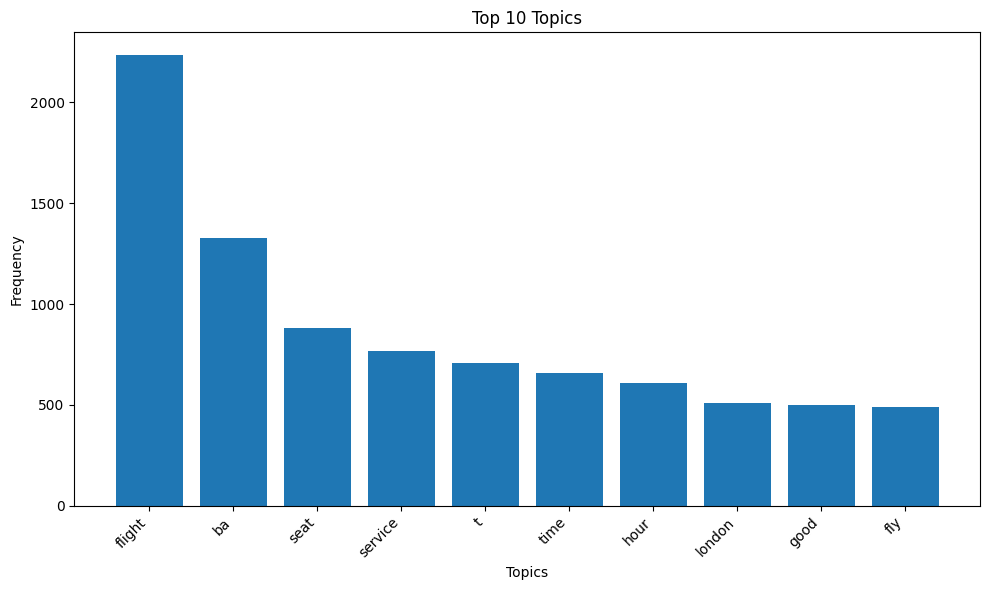

In [96]:
#a barchart showing keyword vs count

# Extract top 10 keywords and counts
top_keywords = [keyword for keyword, count in ranked_keywords[:10]]
top_counts = [count for keyword, count in ranked_keywords[:10]]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_keywords, top_counts)
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Top 10 Topics')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
